In [715]:
#If you need to install in modules in jupyter notebook 
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 
%pip install seaborn 
%pip install graphviz
%pip install scikit-plot   
%pip install statsmodels   


#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime # Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LinearRegression
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packa

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [716]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

In [789]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv') 

In [792]:
from sklearn import preprocessing

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation"]) #Removed columns with names

#normalization
X = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df=pd.DataFrame(x_scaled, columns=df.columns)


AttributeError: 'DataFrame' object has no attribute 'Name'

In [795]:
 #Splitting dataset to x and y
y = df.Attack
X = df[['Defense','HP','Sp. Atk','Sp. Def','Speed']]
# X = df.HP

# MultiVariate  Regression

In [720]:
 from sklearn.linear_model import LinearRegression

In [721]:
def MultiVariateLinearRegression(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
  regr = LinearRegression()
  regr.fit(X, y)
  print('Intercept: \n', regr.intercept_)
  print('Coefficients: \n', regr.coef_)
  kf = KFold(n_splits=10, random_state=None, shuffle=True)
  kf.get_n_splits(X)
  for train_index, test_index in kf.split(X):
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_train)
  print("coefficient of determination score",r2_score(y_train,y_pred))
  print("mean squared error",mean_squared_error(y_train,y_pred,squared =False))


In [722]:
MultiVariateLinearRegression(X,y)

Intercept: 
 0.015933105582873475
Coefficients: 
 [ 0.57361907  0.53694675  0.17710785 -0.37966666  0.29630742]
coefficient of determination score 0.45680280610639856
mean squared error 0.13384242318492964


In [796]:
X = X.HP

# Gradient Descent Mini Batch

In [724]:
X_b = np.c_[np.ones((751, 1)), X]  # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[0.21345299 0.72120008]


In [725]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([0.21345299, 1.65585316])

In [726]:
eta = 0.1
n_iterations = 10
m = 100
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))
print (theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

[ 0.10866883 -1.70876764]


array([ 0.72854204, -1.21339713])

In [727]:
X_b.dot(theta)

array([ 0.51834726,  0.44668995,  0.35114687,  0.54701019,  0.45624426,
        0.36070118,  0.52312442,  0.45146711,  0.35592403,  0.51834726,
        0.49446149,  0.44668995,  0.54223303,  0.51834726,  0.42280418,
        0.54223303,  0.43235849,  0.33681541,  0.59000457,  0.47057572,
        0.54223303,  0.42280418,  0.5661188 ,  0.44668995,  0.5661188 ,
        0.44668995,  0.49446149,  0.37503264,  0.47057572,  0.39891841,
        0.30337533,  0.51357011,  0.4419128 ,  0.34636972,  0.39891841,
        0.27948956,  0.55178734,  0.38458695,  0.18394648,  0.06451763,
        0.54223303,  0.37503264,  0.51834726,  0.44668995,  0.37503264,
        0.5661188 ,  0.44668995,  0.44668995,  0.39891841,  0.68554766,
        0.5661188 ,  0.54223303,  0.42280418,  0.49446149,  0.35114687,
        0.54223303,  0.42280418,  0.47057572,  0.30337533,  0.54223303,
        0.42280418,  0.30337533,  0.61389034,  0.54223303,  0.47057572,
        0.39891841,  0.35114687,  0.30337533,  0.49446149,  0.42

In [728]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 240, 0, 350])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


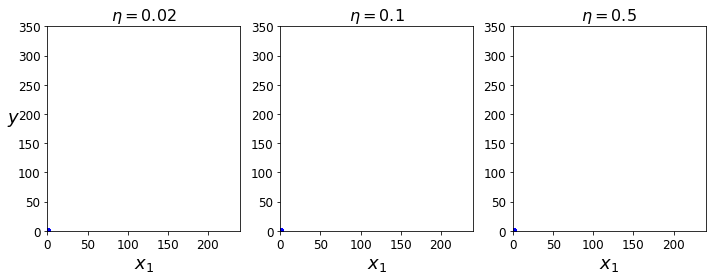

In [729]:
np.random.seed(42)
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

In [730]:
def minibatch(X,y,eta):
    theta_path_mgd = []
    X_b = np.c_[np.ones((751, 1)), X]  # add x0 = 1 to each instance
    m = len(X_b)
    n_iterations = 50
    minibatch_size = 31

    np.random.seed(42)
    theta = np.random.randn(2,1)  # random initialization

    t0, t1 = 200, 1000
    def learning_schedule(t):
        return t0 / (t + t1)

    t = 0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            theta_path_mgd.append(theta)
    theta

In [751]:
minibatch(Xarr,yarr,0.1)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
print(y)

In [ ]:
X_example = 2 * np.random.rand(100, 1)
y_example = 4 + 3 * X_example + np.random.randn(100, 1)
y_example

In [767]:
 y = y.to_numpy()

In [816]:
X = X.to_numpy()

In [ ]:
type(y_example)

In [ ]:
type(y)

In [740]:
type(X_example)

numpy.ndarray

In [ ]:
type(X)

In [ ]:
type(y[0])

print(X)
X = [[i] for i in X]

In [822]:
Xarr = [[i] for i in X]

In [804]:
yarr = [[i] for i in y]

In [814]:
type(Xarr)
# Xarr
Xarray = Xarr.asarray()

AttributeError: 'list' object has no attribute 'asarray'

In [827]:
# type(X_example)
X_example

array([[1.93594753],
       [0.17681645],
       [1.58363568],
       [1.17991179],
       [0.96009193],
       [0.84107156],
       [1.56933653],
       [1.27872271],
       [1.61008934],
       [1.80630212],
       [1.23452742],
       [1.96092545],
       [1.2161757 ],
       [1.27328864],
       [1.10963122],
       [0.18200418],
       [1.45279407],
       [1.09489261],
       [0.90182089],
       [1.82094256],
       [0.5959189 ],
       [1.04720455],
       [1.39528374],
       [1.59294355],
       [0.91869362],
       [1.68418283],
       [1.53783548],
       [0.13247196],
       [0.09172253],
       [1.24161137],
       [0.69482682],
       [0.41826158],
       [1.15929987],
       [0.68312642],
       [1.07452683],
       [0.92023832],
       [1.16953221],
       [0.80060098],
       [1.39533515],
       [0.36013454],
       [1.39300293],
       [0.82332243],
       [1.74863521],
       [1.03047211],
       [1.9462207 ],
       [1.20387079],
       [0.44769813],
       [1.643

In [848]:
new_lst = [[i] for i in X]

In [872]:
# for item in X:
#     temp = np.array([item])
X.

numpy.float64

In [871]:
type(A)

numpy.ndarray

In [867]:
type(X_example[0,0])

numpy.float64